# AI assisted data analysis by Reg D. Bot
Reggie counts with a variety of analytical methods with which to perform exploratory data analysis (EDA) on your data. This notebook demonstrates how to use Reggie's EDA capabilities.

In [1]:
from regdbot.brain.ingest import CSVIngestor
from regdbot.brain import RegDBot, analysis
import duckdb


First let's load a dataset into Reggie's brain. We will use the Directory of Open Access Journals (DOAJ) dataset which is a duckdb database.

In [2]:
db = duckdb.connect('../data/doaj.db')
db

In [3]:
df = db.execute('SELECT * FROM journalcsv__doaj_20240710').fetch_df()
df

,Journal title,Journal URL,URL in DOAJ,When did the journal start to publish all content using an open license?,Alternative title,Journal ISSN (print version),Journal EISSN (online version),Keywords,Languages in which the journal accepts manuscripts,Publisher,...,URL for journal's Open Access statement,Continues,Continued By,LCC Codes,Subjects,DOAJ Seal,Added on Date,Last updated Date,Number of Article Records,Most Recent Article Added
0,Comunicologia,https://portalrevistas.ucb.br/index.php/RCEUCB,https://doaj.org/toc/5bdb6163652d4cb188d109e42...,2008.0,None,None,1981-2132,communication,Portuguese,Universidade Católica de Brasília,...,https://portalrevistas.ucb.br/index.php/RCEUCB...,None,None,P87-96|H,Language and Literature: Philology. Linguistic...,No,2017-04-21T18:17:06Z,2017-11-08T13:48:23Z,0,None
1,Revista de Ciencia y Tecnología,http://www.fceqyn.unam.edu.ar/recyt,https://doaj.org/toc/563943b7369942519c722ea03...,1998.0,RECyT,0329-8922,1851-7587,"natural sciences, biology, biochemistry, pharm...","English, Portuguese, Spanish",Universidad Nacional de Misiones,...,http://www.fceqyn.unam.edu.ar/recyt/index.php/...,None,None,T|Q,Technology | Science,No,2012-07-06T10:11:58Z,2017-11-08T13:48:27Z,0,None
2,Universidad y Empresa,http://revistas.urosario.edu.co/index.php/empr...,https://doaj.org/toc/65ed48d44b3545b48ff4cce5d...,1999.0,Revista Universidad y Empresa,0124-4639,2145-4558,"enterprises, management, internationalisation,...","English, Spanish",Universidad del Rosario,...,http://revistas.urosario.edu.co/index.php/empr...,None,None,HF1-6182|HF5001-6182,Social Sciences: Commerce: Business,No,2011-04-18T17:00:43Z,2017-02-16T18:30:44Z,484,2024-06-24T14:30:20Z
3,Vìsnik Odesʹkogo Nacìonalʹnogo Unìversitetu: H...,http://heraldchem.onu.edu.ua/,https://doaj.org/toc/f85d6c8856c046948ce751f56...,2007.0,Odessa National University Herald: Chemistry,2304-0947,2414-5963,chemistry,"English, Russian, Ukrainian",Odessa I. I. Mechnikov National University,...,http://heraldchem.onu.edu.ua/about/editorialPo...,None,None,QD1-999,Science: Chemistry,No,2018-01-25T19:54:00Z,2018-01-25T19:54:00Z,459,2021-01-20T11:23:59Z
4,Revista Nacional de Administración,https://revistas.uned.ac.cr/index.php/rna,https://doaj.org/toc/b9678203444b424fb65bf6ba1...,2010.0,RNA,1659-4908,1659-4932,"economics, business, entrepreneurship, public ...",Spanish,Universidad Nacional de Educación a Distancia ...,...,https://revistas.uned.ac.cr/index.php/rna/about,None,None,JF20-2112|HF5001-6182,Political science: Political institutions and ...,No,2019-10-09T13:59:49Z,2020-02-05T13:06:11Z,269,2024-06-29T17:42:34Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20617,Frontiers in Natural Products,https://www.frontiersin.org/journals/natural-p...,https://doaj.org/toc/6e0bbf3a3b3b49759d66d2937...,2022.0,None,None,2813-2602,"biologically active molecules, stereochemistry...",English,Frontiers Media S.A.,...,https://www.frontiersin.org/journals/natural-p...,None,None,QD1-999|QK1-989,Science: Chemistry | Science: Botany,No,2023-09-03T21:39:36Z,2024-01-02T10:58:49Z,16,2024-06-25T04:21:51Z
20618,Frontiers in Neuroimaging,https://www.frontiersin.org/journals/neuroimaging,https://doaj.org/toc/bbcf97f8a8de4394a82be4155...,2022.0,None,None,2813-1193,"neuroscience, medical and health sciences, psy...",English,Frontiers Media S.A.,...,https://www.frontiersin.org/journals/neuroimag...,None,None,RC346-429,Medicine: Internal medicine: Neurosciences. Bi...,No,2022-11-20T10:13:16Z,2024-01-06T07:08:42Z,78,2024-06-25T04:24:32Z
20619,Frontiers in Nuclear Engineering,https://www.frontiersin.org/journals/nuclear-e...,https://doaj.org/toc/797f331ab6774bb1856d4f3ec...,2022.0,None,None,2813-3412,"nuclear engineering, plasma physics, fusion pl...",English,Frontiers Media S.A.,...,https://www.frontiersin.org/journals/nuclear-e...,None,None,QC717.6-718.8|QC770-798,Science: Physics: Electricity and magnetism: E...,No,2023-03-27T13:21:11Z,2024-01-11T07:42:11Z,66,202

## Doing EDA

In [4]:
eda = analysis.EDA(df,0.6)


This  dataset is pretty complete but some of its columns have a lot of missing values. Let's see which columns have the most missing values.

In [5]:
eda.count_nulls()

License attributes                                                             20392
Continued By                                                                   20386
Continues                                                                      20261
Preservation Service: national library                                         17862
Country of other organisation                                                  16350
URL for deposit policy                                                         16131
Waiver policy information URL                                                  15905
APC amount                                                                     13595
Deposit policy directory                                                       13473
Other fees information URL                                                     13375
Preservation Services                                                          13309
Alternative title                                                

We can also extract a list of the columns that are mostly null.

In [6]:
eda.mostly_null_cols

Index(['Alternative title', 'Country of other organisation',
       'License attributes', 'APC amount', 'Waiver policy information URL',
       'Other fees information URL', 'Preservation Services',
       'Preservation Service: national library', 'Deposit policy directory',
       'URL for deposit policy', 'Continues', 'Continued By'],
      dtype='object')

The eda object has a property called `df_filtered` which is the original dataframe with the columns that are mostly null removed. Let's see the columns that are left. Below, let's select only those that are catergorical.

In [7]:
eda.df_filtered[eda.categorical_columns]

,Journal title,Journal URL,URL in DOAJ,Journal ISSN (print version),Journal EISSN (online version),Keywords,Languages in which the journal accepts manuscripts,Publisher,Country of publisher,Other organisation,...,Article metadata includes ORCIDs,Journal complies with I4OC standards for open citations,Does the journal comply to DOAJ's definition of open access?,URL for journal's Open Access statement,LCC Codes,Subjects,DOAJ Seal,Added on Date,Last updated Date,Most Recent Article Added
0,Comunicologia,https://portalrevistas.ucb.br/index.php/RCEUCB,https://doaj.org/toc/5bdb6163652d4cb188d109e42...,<NA>,1981-2132,communication,Portuguese,Universidade Católica de Brasília,Brazil,<NA>,...,<NA>,<NA>,Yes,https://portalrevistas.ucb.br/index.php/RCEUCB...,P87-96|H,Language and Literature: Philology. Linguistic...,No,2017-04-21T18:17:06Z,2017-11-08T13:48:23Z,<NA>
1,Revista de Ciencia y Tecnología,http://www.fceqyn.unam.edu.ar/recyt,https://doaj.org/toc/563943b7369942519c722ea03...,0329-8922,1851-7587,"natural sciences, biology, biochemistry, pharm...","English, Portuguese, Spanish",Universidad Nacional de Misiones,Argentina,"Universidad Nacional de Misiones, Facultad de ...",...,<NA>,<NA>,Yes,http://www.fceqyn.unam.edu.ar/recyt/index.php/...,T|Q,Technology | Science,No,2012-07-06T10:11:58Z,2017-11-08T13:48:27Z,<NA>
2,Universidad y Empresa,http://revistas.urosario.edu.co/index.php/empr...,https://doaj.org/toc/65ed48d44b3545b48ff4cce5d...,0124-4639,2145-4558,"enterprises, management, internationalisation,...","English, Spanish",Universidad del Rosario,Colombia,<NA>,...,<NA>,<NA>,Yes,http://revistas.urosario.edu.co/index.php/empr...,HF1-6182|HF5001-6182,Social Sciences: Commerce: Business,No,2011-04-18T17:00:43Z,2017-02-16T18:30:44Z,2024-06-24T14:30:20Z
3,Vìsnik Odesʹkogo Nacìonalʹnogo Unìversitetu: H...,http://heraldchem.onu.edu.ua/,https://doaj.org/toc/f85d6c8856c046948ce751f56...,2304-0947,2414-5963,chemistry,"English, Russian, Ukrainian",Odessa I. I. Mechnikov National University,Ukraine,Odessa I. I. Mechnikov National University,...,<NA>,<NA>,Yes,http://heraldchem.onu.edu.ua/about/editorialPo...,QD1-999,Science: Chemistry,No,2018-01-25T19:54:00Z,2018-01-25T19:54:00Z,2021-01-20T11:23:59Z
4,Revista Nacional de Administración,https://revistas.uned.ac.cr/index.php/rna,https://doaj.org/toc/b9678203444b424fb65bf6ba1...,1659-4908,1659-4932,"economics, business, entrepreneurship, public ...",Spanish,Universidad Nacional de Educación a Distancia ...,Costa Rica,Universidad Nacional de Educación a Distancia ...,...,<NA>,<NA>,Yes,https://revistas.uned.ac.cr/index.php/rna/about,JF20-2112|HF5001-6182,Political science: Political institutions and ...,No,2019-10-09T13:59:49Z,2020-02-05T13:06:11Z,2024-06-29T17:42:34Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20617,Frontiers in Natural Products,https://www.frontiersin.org/journals/natural-p...,https://doaj.org/toc/6e0bbf3a3b3b49759d66d2937...,<NA>,2813-2602,"biologically active molecules, stereochemistry...",English,Frontiers Media S.A.,Switzerland,<NA>,...,Yes,Yes,Yes,https://www.frontiersin.org/journals/natural-p...,QD1-999|QK1-989,Science: Chemistry | Science: Botany,No,2023-09-03T21:39:36Z,2024-01-02T10:58:49Z,2024-06-25T04:21:51Z
20618,Frontiers in Neuroimaging,https://www.frontiersin.org/journals/neuroimaging,https://doaj.org/toc/bbcf97f8a8de4394a82be4155...,<NA>,2813-1193,"neuroscience, medical and health sciences, psy...",English,Frontiers Media S.A.,Switzerland,<NA>,...,Yes,Yes,Yes,https://www.frontiersin.org/journals/neuroimag...,RC346-429,Medicine: Internal medicine: Neurosciences. Bi...,No,2022-11-20T10:13:16Z,2024-01-06T07:08:42Z,2024-06-25T04:24:32Z
20619,Frontiers in Nuclear Engineering,https://www.frontiersin.org/journals/nuclear-e...,https://doaj.org/toc/797f331ab6774bb1856d4f3ec...,<NA>,2813-3412,"nuclear engineering, plasma physics, fusion pl...",English,Frontiers Media S.A.,Switzerland,<NA>,...,Yes,Yes,Yes,https://www.frontiersin.org/jou

## Exploring Categorical Values
For categorical columns, we can see the unique values and their proportion.

In the example below we can look at what proportion of the journals in the directory of Open Access Journals have a DOAJ Seal.

In [8]:
eda.show_categorical('DOAJ Seal')

,count,proportion
DOAJ Seal,,
No,18951,91.897003
Yes,1671,8.102997


We can also look at the proportion of journals from each country in the dataset.

In [6]:
eda.show_categorical('Country of publisher')

,count,proportion
Country of publisher,,
Indonesia,2376,11.521676
United Kingdom,2121,10.285132
Brazil,1575,7.637475
United States,1156,5.605664
Spain,985,4.776452
...,...,...
Mali,1,0.004849
Malawi,1,0.004849
South Sudan,1,0.004849


Since there are too many countries, we can look at the top 30 countries in a bar plot.

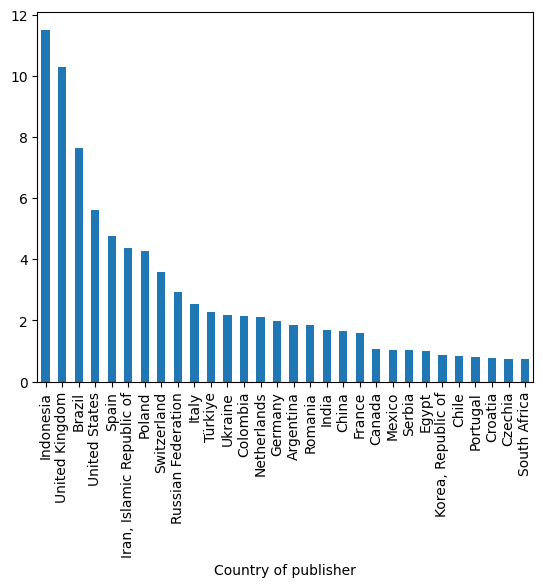

In [8]:
eda.plot_categorical('Country of publisher', topn=30)

## Exploring Numerical Variables

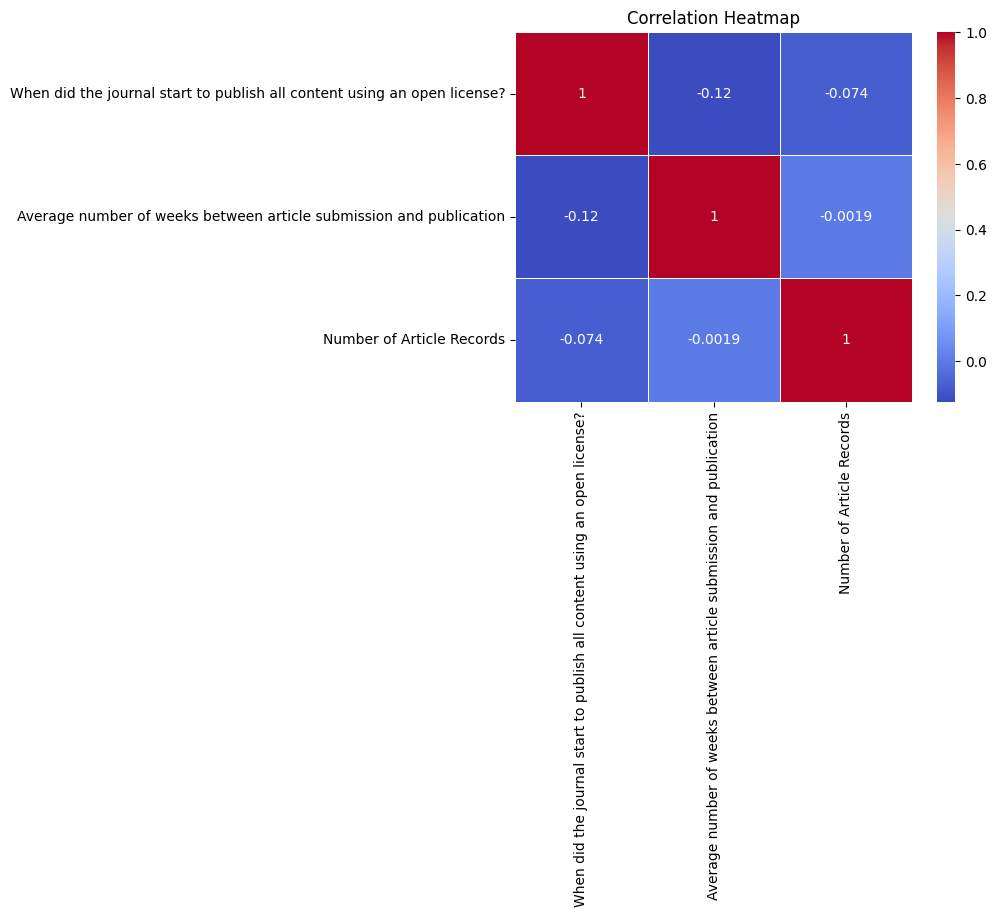

In [10]:
eda.plot_correlation()